In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/prepared/prepared_basic.csv')

In [4]:
data.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>85123A</th>
      <th>71053</th>
      <th>84406B</th>
      <th>84029G</th>
      <th>84029E</th>
      <th>22752</th>
      <th>21730</th>
      <th>22633</th>
      <th>22632</th>
      <th>...</th>
      <th>RSA</th>
      <th>Saudi Arabia</th>
      <th>Singapore</th>
      <th>Spain</th>
      <th>Sweden</th>
      <th>Switzerland</th>
      <th>USA</th>
      <th>United Arab Emirates</th>
      <th>United Kingdom</th>
      <th>Unspecified</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>-100.0</td>
      <td>...</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
<p>1 rows × 3703 columns</p>
</div>

In [5]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score


In [6]:
K_values = range(2, 10, 1)
progress = 0
scores = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    scores.append(score)
    
    progress += 1
    print ('\r' + str(int(100 * progress / len(K_values))), end='%')

    
    

12%

25%

37%

50%

62%

75%

87%

100%

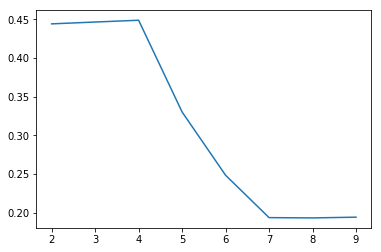

In [7]:
plt.plot(K_values, scores)

In [8]:
scores, list(K_values)

([0.4440951813487304,
  0.4464737963205504,
  0.44877548258803257,
  0.33017879824257795,
  0.24844917002981845,
  0.1936820076706985,
  0.193313819716953,
  0.1942714057530851],
 [2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
best_value = K_values[[i for i, j in enumerate(scores) if j == max(scores)][0]] 
best_value

4

In [15]:
kmeans = KMeans(n_clusters=best_value)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
clusters_df = pd.DataFrame()

In [19]:
clusters_df['CustomerID'] = data['CustomerID']

In [17]:
clusters_df['SegmentNo'] = kmeans.labels_

In [21]:
clusters_df.to_csv('./results/segments_basic_kmeans.csv', index=False)

In [30]:
clusters_df['SegmentNo'].value_counts()

1    2172
0    2165
3       1
2       1
Name: SegmentNo, dtype: int64